In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

c:\Users\user\.conda\envs\test\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\.conda\envs\test\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\user\.conda\envs\test\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
inter_dim1 = 128
inter_dim2 = 32
latent_dim = 3
EPOCH = 30
learning_rate = 0.005

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28,28)),
      layers.Flatten(),
      layers.Dense(inter_dim1, activation='relu'),
      layers.Dense(inter_dim2, activation='relu'),
      layers.Dense(latent_dim),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Input(shape=(latent_dim,)),
      layers.Dense(inter_dim2, activation='relu'),
      layers.Dense(inter_dim1, activation='relu'),
      layers.Dense(28*28, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [5]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 104,707
Trainable params: 104,707
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                128       
                                                                 
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 105,488
Trainable params: 105,488
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=losses.MeanSquaredError())

In [8]:
history = autoencoder.fit(x_train, x_train,
                epochs=EPOCH,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0287 - val_loss: 0.0248
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0238 - val_loss: 0.0229
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0230 - val_loss: 0.0231
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0227 - val_loss: 0.0223
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0224 - val_loss: 0.0221
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0223 - val_loss: 0.0221
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0221 - val_loss: 0.0225
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0220 - val_loss: 0.0226
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0220 - val_loss: 0.0227
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.021

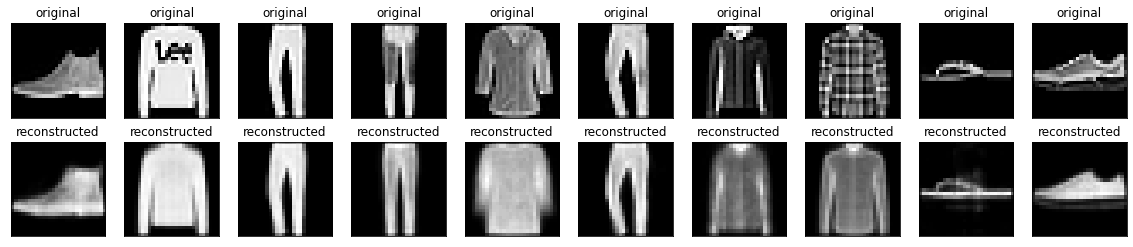

In [9]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
losses = history.history['loss']
test_losses = history.history['val_loss']

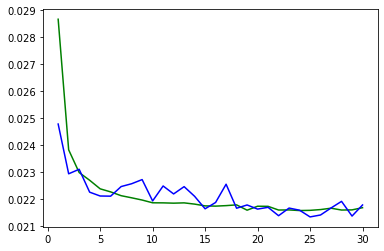

In [11]:
x = range(1,31)
plt.plot(x, losses, 'g', x, test_losses, 'b')
